In [1]:
!pip install scikit-learn --user --upgrade

  Using cached numpy-1.23.4-cp38-cp38-win_amd64.whl (14.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [6]:
!pip install pillow

  Using cached Pillow-9.3.0-cp38-cp38-win_amd64.whl (2.5 MB)


In [22]:
!pip install matplotlib

  Using cached matplotlib-3.6.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.6-cp38-cp38-win_amd64.whl (163 kB)


In [2]:
!pip install keras
!pip install tensorflow

  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wrapt-1.14.1-cp38-cp38-win_amd64.whl (35 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
  Using cached h5py-3.7.0-cp38-cp38-win_amd64.whl (2.6 MB)
     ------------------------------------- 896.1/896.1 kB 18.8 MB/s eta 0:00:00
     ------

In [3]:
print(os.listdir(dir))

['간장게장', '갈비구이', '갈비찜', '갈비탕', '갈치구이', '감자채볶음', '감자탕', '계란국', '계란찜', '고등어구이', '고등어조림', '고추장진미채볶음', '곰탕_설렁탕', '곱창구이', '곱창전골', '김밥', '김치볶음밥', '김치찌개', '김치찜', '깍두기', '닭갈비', '닭계장', '닭볶음탕', '동태찌개', '된장찌개', '두부김치', '떡갈비', '떡국_만두국', '떡볶이', '라면', '막국수', '만두', '매운탕', '물냉면', '미역국', '배추김치', '보쌈', '북엇국', '불고기', '비빔냉면', '비빔밥', '삼겹살', '삼계탕', '소세지볶음', '수육', '수제비', '알밥', '애호박볶음', '양념치킨', '유부초밥', '육개장', '육회', '잡곡밥', '잡채', '제육볶음', '족발', '주먹밥', '짜장면', '짬뽕', '피자', '후라이드치킨']


0 간장게장
간장게장  파일 길이 :  999
간장게장  :  D:\download\koreanfood\kfood\all_remake\간장게장\Img_093_0480.jpg


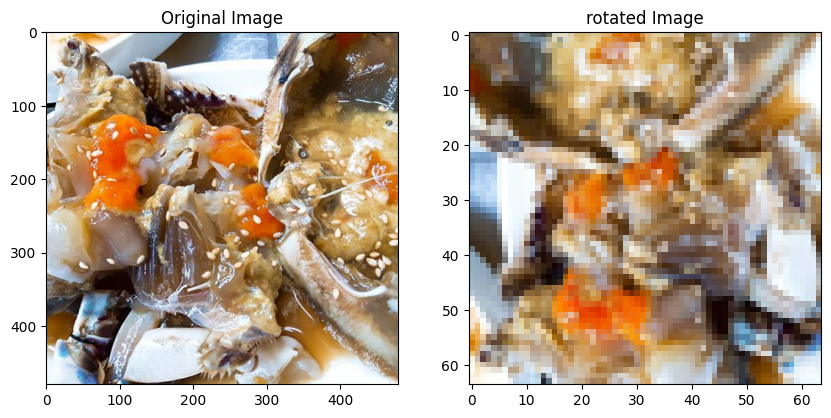

In [6]:
import os, re, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
dir = 'D:\\download\\koreanfood\\kfood\\all_remake'
categories = ['간장게장', '갈비구이', '갈비찜', '갈비탕',
              '갈치구이', '감자채볶음', '감자탕', '계란국',
              '계란찜', '고등어구이', '고등어조림', '고추장진미채볶음',
              '곰탕_설렁탕', '곱창구이', '곱창전골', '김밥', '김치볶음밥',
              '김치찌개', '김치찜', '깍두기', '닭갈비', '닭계장', '닭볶음탕',
              '동태찌개', '된장찌개', '두부김치', '떡갈비', '떡국_만두국',
              '떡볶이', '라면', '막국수', '만두', '매운탕', '물냉면', '미역국',
              '배추김치', '보쌈', '북엇국', '불고기', '비빔냉면', '비빔밥',
              '삼겹살', '삼계탕', '소세지볶음', '수육', '수제비', '알밥',
              '애호박볶음', '양념치킨', '유부초밥', '육개장', '육회', '잡곡밥',
              '잡채', '제육볶음', '족발', '주먹밥', '짜장면', '짬뽕', '피자',
              '후라이드치킨']  # os.listdir(dir) 

num_classes = len(categories)

image_w = 64
image_h = 64


for idx, cate in enumerate(categories):
    print(idx,cate)
    
    #label = cate
    #one-hot 
    label = [0 for i in range(num_classes)]        # 카테고리 인덱스 순서로 라벨링
    label[idx] = 1

    image_dir = dir + "\\" + cate
    files = glob.glob(image_dir+"\\*.jpg")          # 해당 폴더안의 jpg 모두를 file에 넣기
    print(cate, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):

#         경로에 한글이 있다면 작동하지 않는다. 
#         직관성적인 한글 쓰기 위해 다른 방법 사용
#         img1 = cv2.imread(f,cv2.IMREAD_COLOR)
#         img = cv2.resize(img1, dsize=(64,64))

        img1 = Image.open(f)
        img2 = img1.convert("RGB")
        img3 = img2.rotate(90)
        img4 = img3.resize((image_w, image_h))
        data = np.asarray(img4)

        if i == 478 :
            print(cate, " : ", f)

            fig, ax = plt.subplots(1,2, figsize=(10,5))
            ax[0].imshow(img2)
            ax[0].set_title('Original Image')
            ax[1].imshow(img4)
            ax[1].set_title('rotated Image')
    break

#1시24분

In [9]:
import os, re, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
dir = 'D:\\download\\koreanfood\\kfood\\all_remake'
categories = ['간장게장', '갈비구이', '갈비찜', '갈비탕',
              '갈치구이', '감자채볶음', '감자탕', '계란국',
              '계란찜', '고등어구이', '고등어조림', '고추장진미채볶음',
              '곰탕_설렁탕', '곱창구이', '곱창전골', '김밥', '김치볶음밥',
              '김치찌개', '김치찜', '깍두기', '닭갈비', '닭계장', '닭볶음탕',
              '동태찌개', '된장찌개', '두부김치', '떡갈비', '떡국_만두국',
              '떡볶이', '라면', '막국수', '만두', '매운탕', '물냉면', '미역국',
              '배추김치', '보쌈', '북엇국', '불고기', '비빔냉면', '비빔밥',
              '삼겹살', '삼계탕', '소세지볶음', '수육', '수제비', '알밥',
              '애호박볶음', '양념치킨', '유부초밥', '육개장', '육회', '잡곡밥',
              '잡채', '제육볶음', '족발', '주먹밥', '짜장면', '짬뽕', '피자',
              '후라이드치킨']  # os.listdir(dir) 

num_classes = len(categories)

image_w = 64
image_h = 64



X = []
y = []

for idx, cate in enumerate(categories):
    print(idx,cate)
    
    #label = cate
    #one-hot 
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    image_dir = dir + "\\" + cate
    files = glob.glob(image_dir+"\\*.jpg")
    print(cate, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):

#         경로에 한글이 있다면 작동하지 않는다. 
#         직관성적인 한글 쓰기 위해 다른 방법 사용
#         img1 = cv2.imread(f,cv2.IMREAD_COLOR)
#         img = cv2.resize(img1, dsize=(64,64))

        img = Image.open(f)
        img = img.convert("RGB")
        if i % 2 ==0:           # 이미지 반정도를 90도로 회전
            img = img.rotate(90)
        img = img.resize((image_w, image_h))   # 64로 사진 줄이기 ( 보간 사용?)
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i == 500 :
            print(cate, " : ", f)
            break # 1000장은 너무 많아 500장으로 줄였다.

X = np.array(X)
y = np.array(y)



0 간장게장
간장게장  파일 길이 :  999
간장게장  :  D:\download\koreanfood\kfood\all_remake\간장게장\Img_093_0502.jpg
1 갈비구이
갈비구이  파일 길이 :  998
갈비구이  :  D:\download\koreanfood\kfood\all_remake\갈비구이\Img_000_0501.jpg
2 갈비찜
갈비찜  파일 길이 :  991
갈비찜  :  D:\download\koreanfood\kfood\all_remake\갈비찜\Img_124_0505.jpg
3 갈비탕
갈비탕  파일 길이 :  1000
갈비탕  :  D:\download\koreanfood\kfood\all_remake\갈비탕\Img_134_0500.jpg
4 갈치구이
갈치구이  파일 길이 :  998
갈치구이  :  D:\download\koreanfood\kfood\all_remake\갈치구이\Img_001_0501.jpg
5 감자채볶음
감자채볶음  파일 길이 :  1000
감자채볶음  :  D:\download\koreanfood\kfood\all_remake\감자채볶음\Img_078_0500.jpg
6 감자탕
감자탕  파일 길이 :  997
감자탕  :  D:\download\koreanfood\kfood\all_remake\감자탕\Img_135_0505.jpg
7 계란국
계란국  파일 길이 :  996
계란국  :  D:\download\koreanfood\kfood\all_remake\계란국\Img_014_0505.jpg
8 계란찜
계란찜  파일 길이 :  1002
계란찜  :  D:\download\koreanfood\kfood\all_remake\계란찜\Img_125_0501.jpg
9 고등어구이
고등어구이  파일 길이 :  1000
고등어구이  :  D:\download\koreanfood\kfood\all_remake\고등어구이\Img_002_0500.jpg
10 고등어조림
고등어조림  파일 길이 :  1000
고등어조림  :

C:\Users\hyeon\anaconda3\envs\pj1\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


김밥  :  D:\download\koreanfood\kfood\all_remake\김밥\Img_069_0513.jpg
16 김치볶음밥
김치볶음밥  파일 길이 :  997
김치볶음밥  :  D:\download\koreanfood\kfood\all_remake\김치볶음밥\Img_070_0503.jpg
17 김치찌개
김치찌개  파일 길이 :  995
김치찌개  :  D:\download\koreanfood\kfood\all_remake\김치찌개\Img_119_0509.jpg
18 김치찜
김치찜  파일 길이 :  998
김치찜  :  D:\download\koreanfood\kfood\all_remake\김치찜\Img_126_0502.jpg
19 깍두기
깍두기  파일 길이 :  997
깍두기  :  D:\download\koreanfood\kfood\all_remake\깍두기\Img_030_0502.jpg
20 닭갈비
닭갈비  파일 길이 :  996
닭갈비  :  D:\download\koreanfood\kfood\all_remake\닭갈비\Img_004_0500.jpg
21 닭계장
닭계장  파일 길이 :  999
닭계장  :  D:\download\koreanfood\kfood\all_remake\닭계장\Img_120_0504.jpg
22 닭볶음탕
닭볶음탕  파일 길이 :  1001
닭볶음탕  :  D:\download\koreanfood\kfood\all_remake\닭볶음탕\Img_128_0501.jpg
23 동태찌개
동태찌개  파일 길이 :  1000
동태찌개  :  D:\download\koreanfood\kfood\all_remake\동태찌개\Img_121_0500.jpg
24 된장찌개
된장찌개  파일 길이 :  998
된장찌개  :  D:\download\koreanfood\kfood\all_remake\된장찌개\Img_122_0505.jpg
25 두부김치
두부김치  파일 길이 :  1000
두부김치  :  D:\download\koreanfood\k

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save(".\\multi_image_data_5.npy", xy)

In [ ]:
X_train[101]

In [10]:
y_train[101]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:

print(X_train.shape)
print(X_train.shape[0])

(22920, 128, 128, 3)
22920


In [5]:
X_train = X_train / 255 # .astype(float)

In [6]:
X_test = X_test / 255  # .astype(float)

In [7]:
print(X_train[101])
print(X_train.dtype)


[[[0.83137255 0.79607843 0.77647059]
  [0.82352941 0.78823529 0.76862745]
  [0.83529412 0.8        0.78039216]
  ...
  [0.76862745 0.72941176 0.67058824]
  [0.77254902 0.72941176 0.66666667]
  [0.77254902 0.72156863 0.67058824]]

 [[0.82745098 0.79215686 0.77254902]
  [0.82352941 0.78823529 0.77254902]
  [0.83137255 0.79607843 0.77647059]
  ...
  [0.76470588 0.72941176 0.6745098 ]
  [0.78431373 0.7372549  0.68235294]
  [0.77254902 0.72941176 0.68235294]]

 [[0.82352941 0.78823529 0.76470588]
  [0.82745098 0.79215686 0.76862745]
  [0.83529412 0.8        0.78039216]
  ...
  [0.78039216 0.7372549  0.69411765]
  [0.78823529 0.7372549  0.69411765]
  [0.77254902 0.72941176 0.69019608]]

 ...

 [[0.6        0.65882353 0.54117647]
  [0.59215686 0.6745098  0.51372549]
  [0.67058824 0.7254902  0.61960784]
  ...
  [0.88627451 0.84313725 0.75294118]
  [0.86666667 0.84705882 0.82352941]
  [0.85490196 0.83529412 0.80784314]]

 [[0.68235294 0.74509804 0.62352941]
  [0.56862745 0.64313725 0.49411765]


In [3]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
X_train, X_test, y_train, y_test = np.load('.\\multi_image_data_5.npy',allow_pickle = True)
print(X_train.shape)
print(X_train.shape[0])

(52605, 64, 64, 3)
52605
